## HW-3 • Math 189 • Wi 2024
### Due Date: Sat, Mar 16th 2024

> NAME: $\color{red}{\text{    Andrew Boyle     }}$
> 
> PID: $\color{red}{\text{    A16282650     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://ucsd-math189-wi24.github.io/syllabus.html#assignments)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

## Configurations
%matplotlib inline

# Question 1

> ##### Linear regression

The `data` folder contains the `housing.csv` dataset which contains housing prices in California from the 1990 California census. The objective is to predict the median house price for California districts based on various features. The features are the following:

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses
9. `median_house_value`: Median house value for households within a block
10. `ocean_proximity`: Location of the house w.r.t ocean/sea


> a. Load the dataset and display the first 5 rows of the dataset.

In [100]:
path = 'csv_files/housing.csv'
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> b. Describe the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [101]:
df['ocean_proximity'] = pd.Categorical(df.ocean_proximity)
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

> c. Fit a linear regression model to predict the `median_house_value` based on all other covariates. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'longitude'),
  Text(1.5, 0, 'latitude'),
  Text(2.5, 0, 'housing_median_age'),
  Text(3.5, 0, 'total_rooms'),
  Text(4.5, 0, 'total_bedrooms'),
  Text(5.5, 0, 'population'),
  Text(6.5, 0, 'households'),
  Text(7.5, 0, 'median_income'),
  Text(8.5, 0, 'median_house_value')])

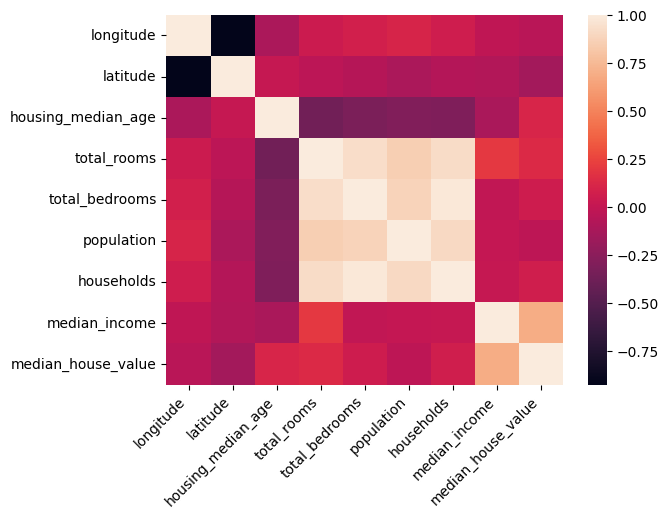

In [102]:
sns.heatmap(df.corr(numeric_only=True))
plt.xticks(rotation=45, ha="right")

In [103]:
full_model = smf.ols('median_house_value ~ longitude + latitude + housing_median_age + \
    total_rooms + total_bedrooms + population + households + median_income + ocean_proximity',data=df).fit()
print(full_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:54:10   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

> d. Based on the summary of the linear regression model, do you think this is a good fit for the data? Explain your answer.

Based on Adjusted R-squared of 0.646 and F statistic of 3112, we are inclined to believe that this model is a good fit. However, we may obtain a better model in 

> e. Comment on the model assumptions and to what extent they are satisfied or not satisfied.

In order to perform OLS regression, we need to satisfy multiple assumptions
* Linearity in the Data
* The error terms are independent
* Errors are normally distributed
* Homoskedasticity in the errors (errors have constant variance)

---


Testing for normally distributed errors

In [104]:
def standardize(x):
    return (x- x.mean()) / x.std()

In [105]:
residuals = standardize(full_model.resid)
# residuals = full_model.resid

# Computing Shapiro - Wilk test for testing normality
shapiro_pval = stats.shapiro(residuals).pvalue
print(f'p value for shapiro test on residuals: {shapiro_pval}') 


p value for shapiro test on residuals: 0.0


C:\Users\ab\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


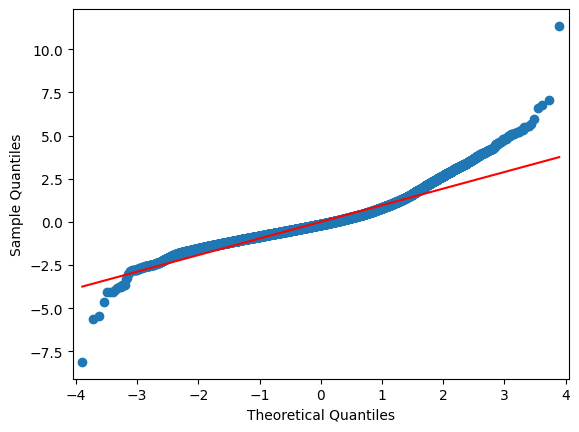

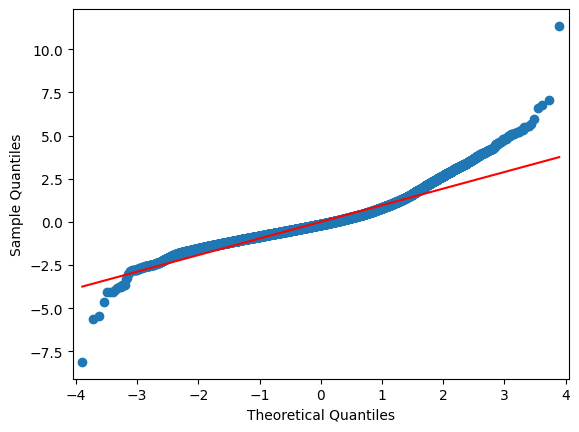

In [106]:
sm.qqplot(residuals, line='r')

Based on the qq plot and the shapiro wilk test, we essentially reject the null hypothesis in favor of the alternate that the residuals do not follow the normal distribution

--- 
Testing for Independence in the error terms

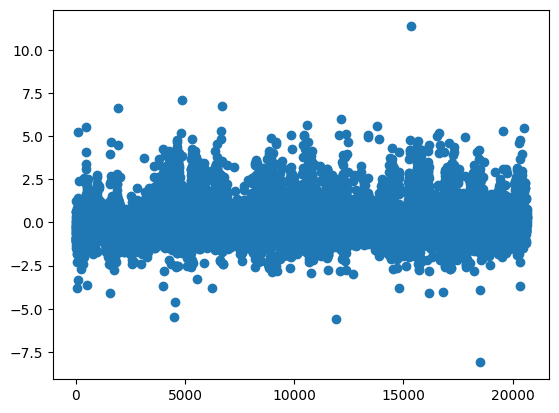

In [107]:
plt.scatter(x=residuals.index, y=residuals)

Errors appear to be uncorrelated with each other implying that the residuals are independent. 
Additionally, the variance of the residuals appears to be roughly the same for all observations implying that the errors are roughly homeskedastic.

> f. Compute the variance inflation factor (VIF) for each covariate. What do you observe?

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
exog = full_model.model.exog
names = full_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: ocean_proximity[T.INLAND]:  2.860
VIF: ocean_proximity[T.ISLAND]:  1.002
VIF: ocean_proximity[T.NEAR BAY]:  1.567
VIF: ocean_proximity[T.NEAR OCEAN]:  1.197
VIF: longitude:  18.091
VIF: latitude:  19.969
VIF: housing_median_age:  1.324
VIF: total_rooms:  12.966
VIF: total_bedrooms:  36.310
VIF: population:  6.446
VIF: households:  35.173
VIF: median_income:  1.786


> g. Drop the covariate(s) with a variance inflation factor greater than 5 and fit the linear regression model again.

In [109]:
new_model = smf.ols('median_house_value ~ ocean_proximity + housing_median_age + median_income', data=df).fit()

print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     5092.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:54:10   Log-Likelihood:            -2.6049e+05
No. Observations:               20640   AIC:                         5.210e+05
Df Residuals:                   20633   BIC:                         5.211e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

> h. Based on the summary of the regression model `new_model` interpret the coefficients of the covariates.

* Intercept: predicted house value of 51,510 if house just located <1H Ocean  
* Inland: $\dots$

all coefficients are statistically significant in this new model
 

> i. Holding all other covariates constant, which of the `ocean_proximity` categories do you expect to find a house with the highest median house value? Why?

I would expect houses on an island to have the highest median house value because the estimated coefficient is the highest 

---

# Question 2

For this question, we are going to use the `abortion` dataset which consists of Abortion Opinions in the General Social Survey (GSS) from 1977 to 2018. The article related to the dataset can be found [here](https://gss.norc.org/Documents/reports/methodological-reports/MR133%20Abortion.pdf).

The data has been preprocessed and is available in the `data` folder as `abortion.csv`. The dataset contains the following columns:

1. `abortion`: Do you think that abortion should be legal for any reason?
2. `year`: Year of the survey
3. `age`: Respondent's age
4. `sex`: Respondent's sex
5. `race`: Respondent's race
6. `education`: How many years of education has the respondent completed
7. `relactiv`: Self-reported religiosity
8. `pid`: Respondent's political party identification (0: strong democrat ... 6: strong republican)


<br><br><br><br>

> a. Load the dataset and display the first 5 rows of the dataset.

In [110]:
path = 'csv_files/abortion.csv'
df = pd.read_csv(path)
df.head()

,year,age,race,sex,educ,relactiv,pid,abortion
0,2006,50.0,Black,Female,13.0,4.0,0.0,1.0
1,2006,50.0,Black,Female,12.0,1.0,0.0,1.0
2,2006,20.0,Black,Male,14.0,1.0,0.0,1.0
3,2006,29.0,Black,Female,12.0,1.0,3.0,1.0
4,2006,23.0,Black,Female,16.0,1.0,0.0,1.0


> b. Summarize the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [111]:

df['race'] = pd.Categorical(df.race)
df['sex'] = pd.Categorical(df.sex)

df.dtypes


year           int64
age          float64
race        category
sex         category
educ         float64
relactiv     float64
pid          float64
abortion     float64
dtype: object

> c. Fit a logistic regression model to predict the `abortion` based on all other covariates.

In [112]:
model1 = smf.logit('abortion ~ year + age + race + sex + educ + relactiv + pid', data=df).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.285870
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10124
Method:                           MLE   Df Model:                            8
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.1187
Time:                        23:54:11   Log-Likelihood:                -2896.7
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                3.843e-163
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.1231     16.745      0.485      0.628     -24.696      40.942
race[T.Other]    -0.

> d. Identify the covariates which are statistically significant at a 15% significance level.

Other, sex, age, educ, relactive, pid

> e. Based on the variables you identified in part d, fit a new logistic regression model only including those covariates.

In [113]:
model2 = smf.logit('abortion ~ sex + age + educ + relactiv + pid', data=df).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.286184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10127
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.1177
Time:                        23:54:11   Log-Likelihood:                -2899.9
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                5.363e-165
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7339      0.184      9.398      0.000       1.372       2.095
sex[T.Male]     0.2246    

> f. Include an interaction term between `sex` and `pid` in your logistic regression model.

In [114]:
model3 = smf.logit('abortion ~ sex + age + educ + relactiv + pid + sex*pid', data=df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.286080
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10126
Method:                           MLE   Df Model:                            6
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.1180
Time:                        23:54:11   Log-Likelihood:                -2898.9
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                2.465e-164
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8094      0.192      9.422      0.000       1.433       2.186
sex[T.Male]   

> g. Is there sufficient evidence to conclude that the `sex` moderates the effect of `pid` on abortion opinion? Explain your answer.

There is not sufficient evidence. The significance of PID is still valid on any levels

> h. Interpret each coefficient associated with the covariates in the new logistic regression model, `model3`.

The interaction term is now insignificant. Additionally the effect of being male in the model is now less pronounced than in the first model

> i. Print the confusion matrix and report the classification accuracy of `model3`.

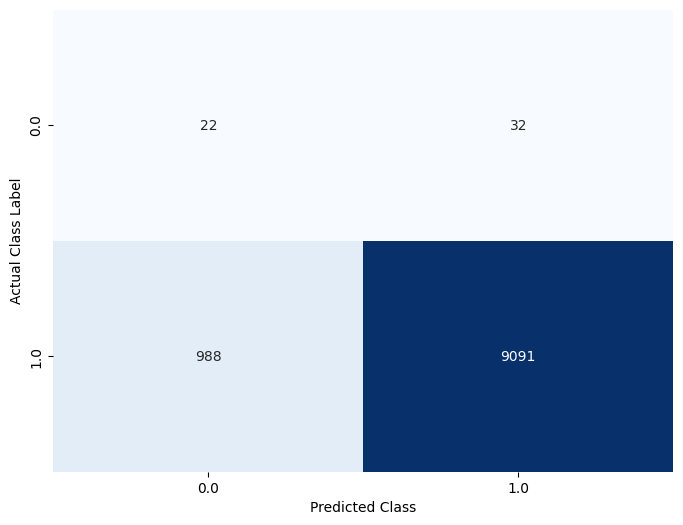

In [115]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
predictions = model3.predict()
predictions = np.array(list(map(lambda x: 1 if x>0.5 else 0, predictions)))
# pred_probs = model3.predict_proba
cm = confusion_matrix(predictions, df['abortion'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(df['abortion']), yticklabels=np.unique(df['abortion']))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class Label')
plt.show()

> j. Plot the ROC curve and compute the AUC of `model3`.

In [116]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(df.abortion, model3.predict())
indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1+5e-3)
tpr[indx], fpr[indx], thresholds[indx]

(array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


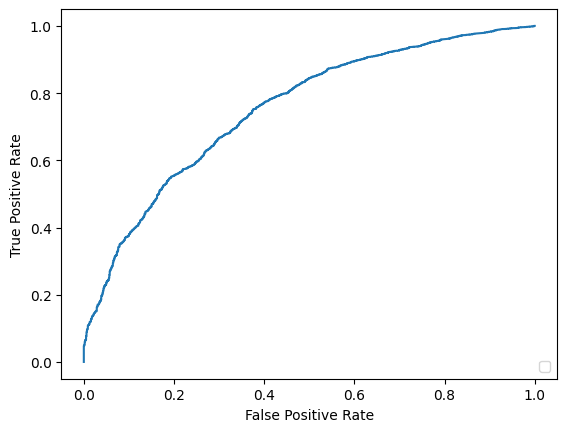

In [117]:
sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [118]:
roc_auc_score(df.abortion, model3.predict())

0.7518813834688303